In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip



--2020-07-11 04:59:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  92.2MB/s    in 0.7s    

2020-07-11 04:59:21 (92.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Main folder


*   Train--cats and dogs
*   validation--cats and dogs



In [ ]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip" ## which zip file you want to extract
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')  ## In which location you want to store extracted files
zip_ref.close()

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered/train")

['cats', 'dogs']

In [ ]:
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats")))
print(len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs")))

1000
1000


In [ ]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
## file names
train_cat_filenames = os.listdir(train_cat_dir)
train_cat_filenames[:4]

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

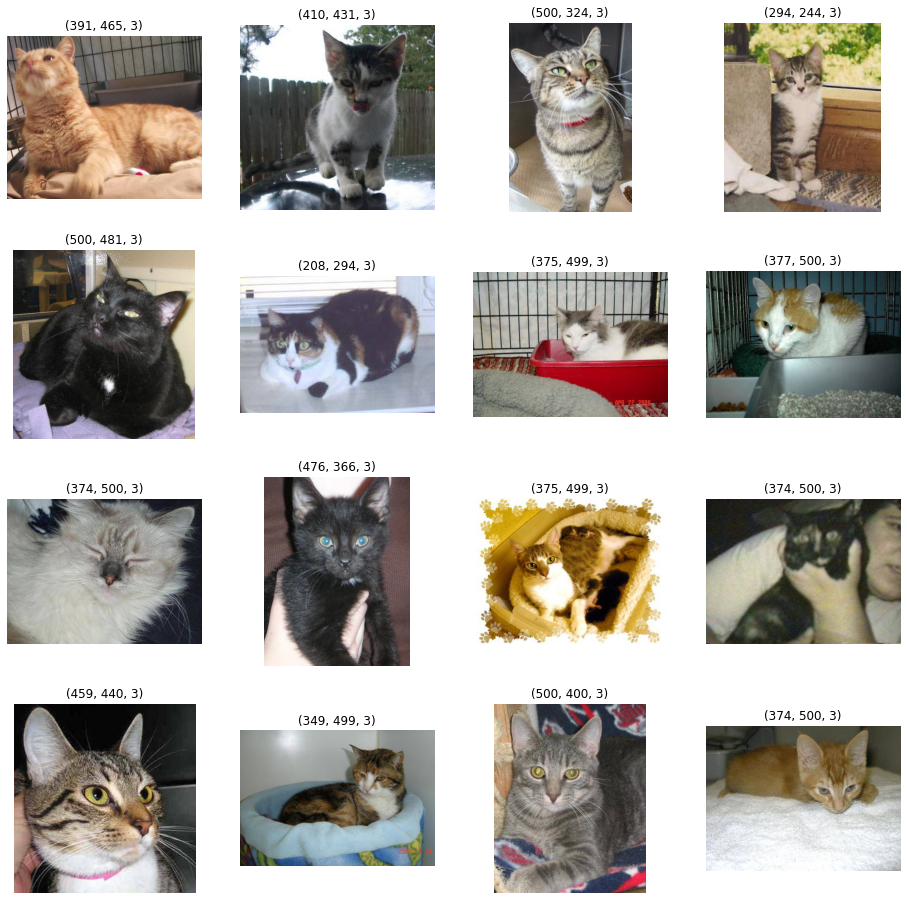

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j = 1 ## plot position
for i in range(16):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1

Read the image data<br>
We have different shapes here.<br>
We need same shapes for each and every image<br>
reshaping the images<br>
cats and dogs labelling<br>

### Creating Train and valiadtion data from Folder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

(20, 150, 150, 3)
(20,)


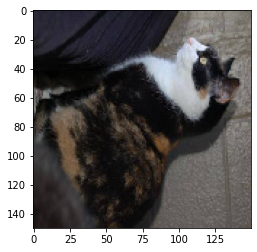

In [ ]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

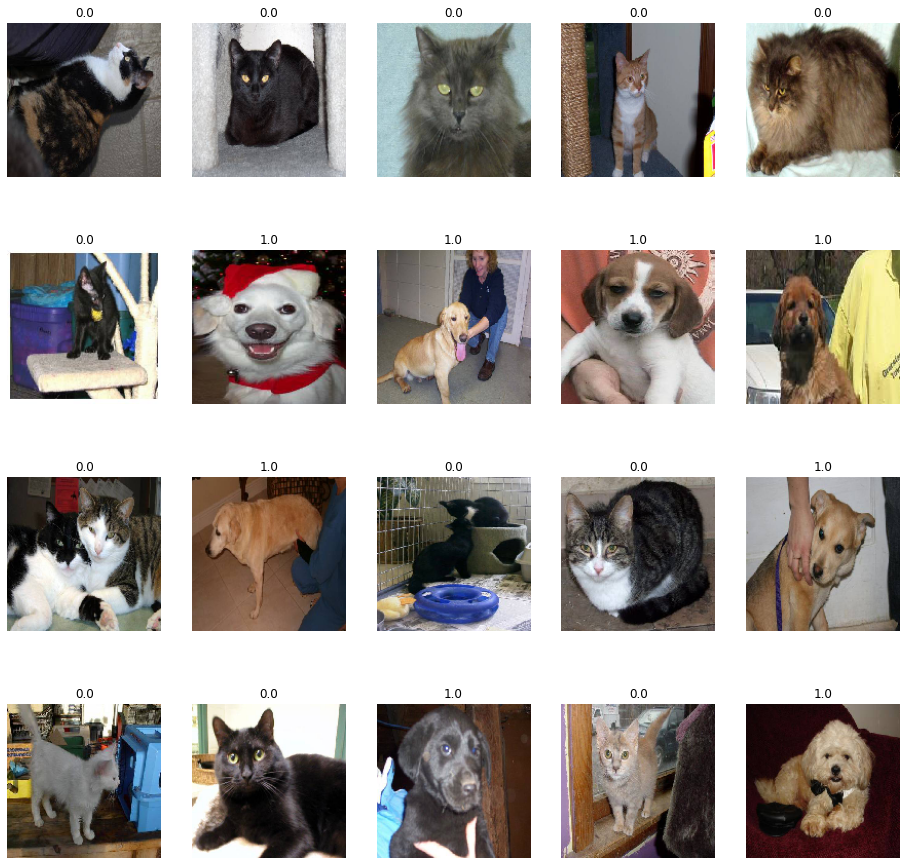

In [ ]:
plt.figure(figsize=(16,16))
pos = 1 ## plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])  # to display image
  plt.title(labels[i])
  plt.axis('off')
  pos += 1

### Build the model

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
## add a conv layer followed by maxpooling

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(16, 3, activation='relu',input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2)) #next layer

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
model.add(Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(Dense(512, activation='relu'))

# Create output layer with a single node and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

#lets us see the summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

### Compiling the model

In [ ]:
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

### Train the model

In [ ]:
history = model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)


Epoch 1/15
100/100 [==============================] - 10s 103ms/step - loss: 0.7520 - accuracy: 0.5745 - val_loss: 0.6212 - val_accuracy: 0.6760
Epoch 2/15
100/100 [==============================] - 10s 102ms/step - loss: 0.6022 - accuracy: 0.6745 - val_loss: 0.6176 - val_accuracy: 0.6520
Epoch 3/15
100/100 [==============================] - 10s 102ms/step - loss: 0.5003 - accuracy: 0.7600 - val_loss: 0.5887 - val_accuracy: 0.6970
Epoch 4/15
100/100 [==============================] - 10s 101ms/step - loss: 0.4195 - accuracy: 0.8070 - val_loss: 0.6435 - val_accuracy: 0.7150
Epoch 5/15
100/100 [==============================] - 10s 102ms/step - loss: 0.3157 - accuracy: 0.8620 - val_loss: 0.7437 - val_accuracy: 0.7020
Epoch 6/15
100/100 [==============================] - 10s 102ms/step - loss: 0.2331 - accuracy: 0.9110 - val_loss: 0.9187 - val_accuracy: 0.7050
Epoch 7/15
100/100 [==============================] - 10s 101ms/step - loss: 0.1621 - accuracy: 0.9395 - val_loss: 0.7882 - val_ac

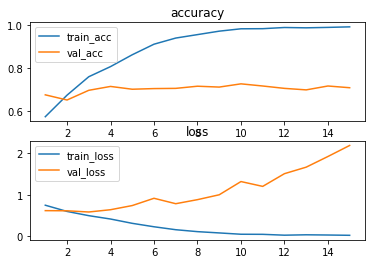

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()



## To predict an image


1.   read image
2.   check shape



1.  resize into required shape(1,150,150,3)
2.   apply scaling





In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/tmp/dog1.jpg')
print(type(img))
#print(img.shape)
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))
#scaling
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)




<class 'PIL.JpegImagePlugin.JpegImageFile'>
(157, 235, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
model.predict(img) ##  greater than 0.5 then correct prediction

array([[0.999887]], dtype=float32)